In [15]:
import matplotlib.pyplot as plt
print('imported matplotlib')
import json
print('imported json')
import pandas as pd
print('imported pandas')
import datetime as dt
print('imported datetime')
import mplcursors
print('imported mplcursors')

imported matplotlib
imported json
imported pandas
imported datetime
imported mplcursors


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


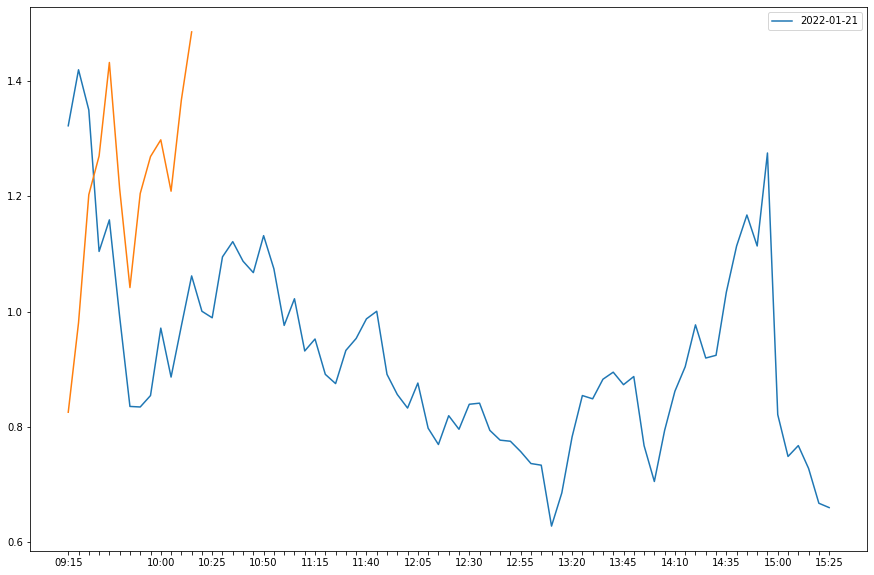

In [58]:
f = open('data_5minute.json')
data = json.load(f) 

df = pd.json_normalize(data)

df['date'] = df['datetime'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S%z").strftime("%Y-%m-%d"))
df['time'] = df['datetime'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S%z").strftime("%H:%M"))
ans = [y for x, y in df.groupby('date', as_index=False)]

plt.rcParams["figure.figsize"]=15,10

grouped = df.groupby(df.date)

for group_name, df_group in grouped:
    start = df_group["time"].min()
    openvalue =  df_group[(df_group['time'] == start)]
    df_group['day_open'] = openvalue['open'].values[0]
    df_group['norm_close'] = df_group['close'] / df_group['day_open']#row.close / row.day_open
#     print(group_name,openvalue.open)
    y = df_group['norm_close'] 
    x = df_group['time']
    ax = plt.gca()
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::5]))
    for label in temp:
        label.set_visible(False)
    plt.legend()
    plt.plot(x, y, label=group_name)
#     print(df_group)    
mplcursors.cursor(hover=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


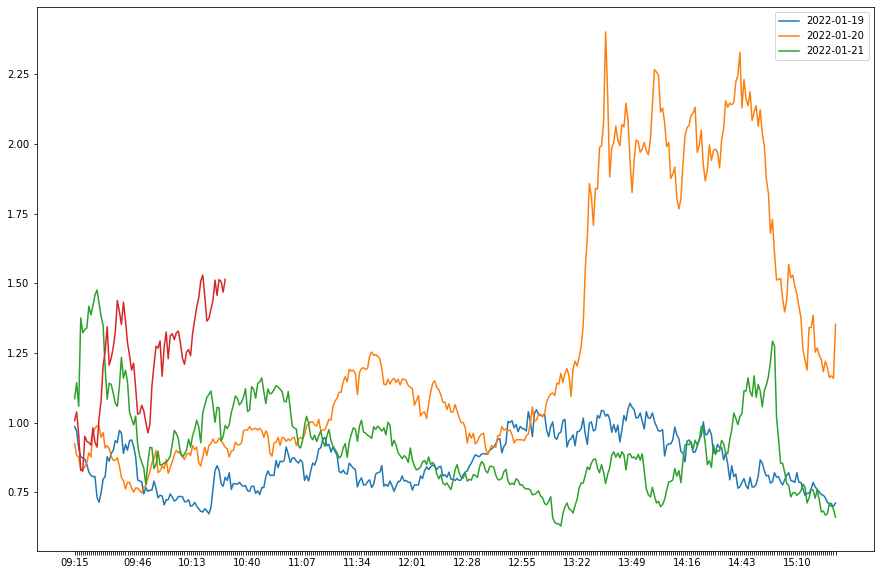

In [56]:
f = open('data_minute.json')
data = json.load(f) 

df = pd.json_normalize(data)

df['date'] = df['datetime'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S%z").strftime("%Y-%m-%d"))
df['time'] = df['datetime'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S%z").strftime("%H:%M"))
ans = [y for x, y in df.groupby('date', as_index=False)]

plt.rcParams["figure.figsize"]=15,10

grouped = df.groupby(df.date)

for group_name, df_group in grouped:
    start = df_group["time"].min()
    openvalue =  df_group[(df_group['time'] == start)]
    df_group['day_open'] = openvalue['open'].values[0]
    df_group['norm_close'] = df_group['close'] / df_group['day_open']#row.close / row.day_open
#     print(group_name,openvalue.open)
    y = df_group['norm_close'] 
    x = df_group['time']
    ax = plt.gca()
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::3]))
    for label in temp:
        label.set_visible(False)
    plt.legend()
    plt.plot(x, y, label=group_name)
#     print(df_group)    
mplcursors.cursor(hover=True)
plt.show()